# Create Latitude and Longitude Combinations

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations
# pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats, lngs)

# When we run this cell, the output is a zip object in memory
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(71.40990194731108, 92.52623681503019),
 (34.286359933914426, -138.33327746331705),
 (-78.12600616405373, -105.1076621495002),
 (57.26892402725559, 85.99785165645443),
 (34.01173026191577, 90.54044559647195),
 (75.72707083906161, 81.53619975123684),
 (-46.559579298119594, -53.263402000680685),
 (-9.59591646029726, 63.38986429912319),
 (89.23034548444008, 101.10960820450634),
 (-43.201080837412746, 34.28847192627626),
 (86.60191153703695, 21.30935377733047),
 (53.7814076539463, -168.4837135950886),
 (85.86814774868404, 81.08302254754415),
 (20.50208035140841, 154.42155163374548),
 (-0.8526753710482069, -120.2942489251111),
 (-67.53169879931585, -85.85362942904086),
 (-7.827224960349042, 23.952815289576762),
 (-30.836389899525578, 3.089388352205532),
 (-30.32775406084788, -120.09957707683819),
 (4.32908402620798, 164.8539300016397),
 (-84.79793533065276, -41.13824979023366),
 (16.852325966477665, -134.51453427599458),
 (-2.584578353558882, 21.009582939537665),
 (-21.455407998227955, -12

In [4]:
# You can only unzip a zipped tuple once before it is removed from the computer’s memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

# Work with citipy

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

576

# Request API Weather Data for All Cities

In [7]:
# Import the requests library.
import requests

requests.__version__

'2.23.0'

In [8]:
# Import the API key.
from config import api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
# units=Imperial added to url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# To reference the city in our code, we need to use the indexing on the cities_list, but this will cause programming
# errors when building the city_url because it adds the index, not the city name, to the city_url. To fix this issue,
# use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index
# and the city from the list.

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Generally, it isn’t good coding practice to add the pass statement to the except block. Ideally, we want to handle
# or catch each error as it happens and do something specific (e.g., add another try block or print out the error).
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | pervomayskoye
Processing Record 5 of Set 1 | lasa
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kaniama
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | ilebo
Processing Record 22 of Set 1 | provideniya
Processing Record 23 of Set 1 | marovoay
Pr

Processing Record 39 of Set 4 | verkhoyansk
Processing Record 40 of Set 4 | chara
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | half moon bay
Processing Record 43 of Set 4 | borzya
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | heze
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | payo
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | humaita
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | dwarka
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | sambava
Processing Record 4 of Set 5 | dabat
Processing Record 5 of Set 5 | labuan
Processing Record 6 of Set 5 | korhogo
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | coracora
Processing Record 9 of Set 5 | aykhal
Processing Record 10 of Set 5 | talara
Processing Record 11 of Set 5 | fort myers beach
Processing Record 12 of Set 5 | shenandoah
Pr

Processing Record 22 of Set 8 | visimo-utkinsk
City not found. Skipping...
Processing Record 23 of Set 8 | sao joao da barra
Processing Record 24 of Set 8 | xadani
City not found. Skipping...
Processing Record 25 of Set 8 | nakhon phanom
Processing Record 26 of Set 8 | north bend
Processing Record 27 of Set 8 | plerin
Processing Record 28 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 29 of Set 8 | solnechnyy
Processing Record 30 of Set 8 | felanitx
Processing Record 31 of Set 8 | pangoa
Processing Record 32 of Set 8 | porto novo
Processing Record 33 of Set 8 | hauterive
Processing Record 34 of Set 8 | okhotsk
Processing Record 35 of Set 8 | jabiru
City not found. Skipping...
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | la plata
Processing Record 38 of Set 8 | san pedro de macoris
Processing Record 39 of Set 8 | atar
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | harper
Processing Record 42 of Set 8 | bose


Processing Record 9 of Set 12 | tabarqah
City not found. Skipping...
Processing Record 10 of Set 12 | shache
Processing Record 11 of Set 12 | muscat
Processing Record 12 of Set 12 | caravelas
Processing Record 13 of Set 12 | aksarka
Processing Record 14 of Set 12 | saint-francois
Processing Record 15 of Set 12 | san cristobal
Processing Record 16 of Set 12 | liverpool
Processing Record 17 of Set 12 | borisoglebsk
Processing Record 18 of Set 12 | weyburn
Processing Record 19 of Set 12 | tukrah
Processing Record 20 of Set 12 | lensk
Processing Record 21 of Set 12 | zhangye
Processing Record 22 of Set 12 | drayton valley
Processing Record 23 of Set 12 | baghdad
Processing Record 24 of Set 12 | bousso
Processing Record 25 of Set 12 | warqla
City not found. Skipping...
Processing Record 26 of Set 12 | neyvo-shaytanskiy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Count the number of cities in city_data
len(city_data)

518

# Convert the Array of Dictionaries to Other Formats & Reorder Columns

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.49,88.40,39.20,80,100,4.47,RU,2020-06-17 22:46:21
1,Fortuna,40.60,-124.16,69.01,52,20,16.11,US,2020-06-17 22:46:22
2,Punta Arenas,-53.15,-70.92,28.40,100,0,3.36,CL,2020-06-17 22:41:30
3,Pervomayskoye,43.92,46.71,67.68,58,97,5.93,RU,2020-06-17 22:46:23
4,Lasa,46.62,10.70,46.40,93,75,5.82,IT,2020-06-17 22:46:24
5,Dikson,73.51,80.55,33.30,90,91,3.94,RU,2020-06-17 22:46:24
6,Mar Del Plata,-38.00,-57.56,60.80,100,90,4.70,AR,2020-06-17 22:46:25
7,Victoria,22.29,114.16,84.00,79,9,8.99,HK,2020-06-17 22:46:25
8,Khatanga,71.97,102.50,50.88,53,81,7.63,RU,2020-06-17 22:46:26
9,East London,-33.02,27.91,59.95,70,1,11.52,ZA,2020-06-17 22:42:57


In [13]:
# Assign new column order to a variable
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed",]

In [14]:
#Assign new column order to df
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Talnakh,RU,2020-06-17 22:46:21,69.49,88.40,39.20,80,100,4.47
1,Fortuna,US,2020-06-17 22:46:22,40.60,-124.16,69.01,52,20,16.11
2,Punta Arenas,CL,2020-06-17 22:41:30,-53.15,-70.92,28.40,100,0,3.36
3,Pervomayskoye,RU,2020-06-17 22:46:23,43.92,46.71,67.68,58,97,5.93
4,Lasa,IT,2020-06-17 22:46:24,46.62,10.70,46.40,93,75,5.82
5,Dikson,RU,2020-06-17 22:46:24,73.51,80.55,33.30,90,91,3.94
6,Mar Del Plata,AR,2020-06-17 22:46:25,-38.00,-57.56,60.80,100,90,4.70
7,Victoria,HK,2020-06-17 22:46:25,22.29,114.16,84.00,79,9,8.99
8,Khatanga,RU,2020-06-17 22:46:26,71.97,102.50,50.88,53,81,7.63
9,East London,ZA,2020-06-17 22:42:57,-33.02,27.91,59.95,70,1,11.52


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Weather Data

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time

## Plot Latitude vs. Temperature

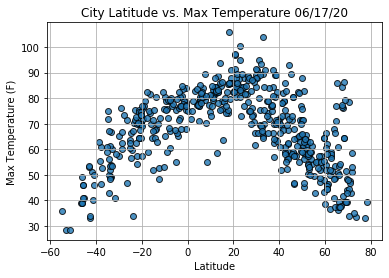

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

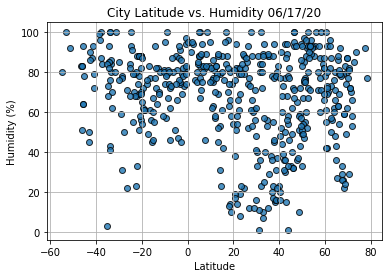

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

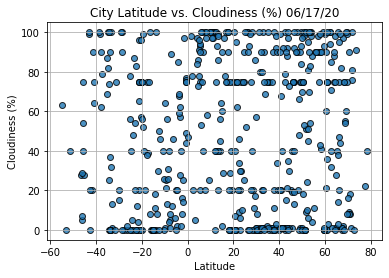

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

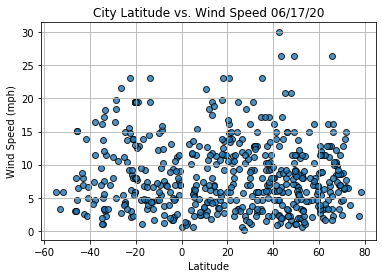

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()